In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import numpy as np

In [ ]:
data = pd.read_excel('Data.xlsx')

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data[data.isnull().values==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [ ]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-30 05:50:00,2022-12-30 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-12-30 18:05:00,2022-12-30 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-12-30 16:50:00,2022-12-30 21:35:00,4h 45m,1 stop,No info,13302


In [ ]:
data = data.sort_values(by=['Date_of_Journey'])

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3835,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,2022-12-30 09:00:00,2022-12-30 11:30:00,2h 30m,non-stop,No info,5515
7356,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,2022-12-30 00:20:00,2022-12-30 13:20:00,13h,1 stop,No info,29528
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2022-12-30 08:55:00,2022-12-30 15:15:00,6h 20m,1 stop,No info,26890
3545,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,2022-12-30 08:50:00,2022-03-02 11:10:00,26h 20m,2 stops,No info,19372
3543,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-12-30 10:05:00,2022-12-30 13:00:00,2h 55m,non-stop,No info,10067


In [ ]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month

In [ ]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-12-30 09:00:00,2022-12-30 11:30:00,2h 30m,non-stop,No info,5515,3,1
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-12-30 00:20:00,2022-12-30 13:20:00,13h,1 stop,No info,29528,3,1
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-12-30 08:55:00,2022-12-30 15:15:00,6h 20m,1 stop,No info,26890,3,1
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2022-12-30 08:50:00,2022-03-02 11:10:00,26h 20m,2 stops,No info,19372,3,1
3543,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-30 10:05:00,2022-12-30 13:00:00,2h 55m,non-stop,No info,10067,3,1


In [ ]:
# 取時間
def extr_hour(data, col):
    data[col + '_hour'] = data[col].dt.hour
    
def extr_minute(data, col):
    data[col + '_minute'] = data[col].dt.minute

In [ ]:
# 刪除
def drop_col(data, col):
    data.drop(col, axis=1, inplace=True)

In [ ]:
extr_hour(data, 'Dep_Time')
extr_minute(data, 'Dep_Time')
drop_col(data, 'Dep_Time')

In [ ]:
extr_hour(data, 'Arrival_Time')
extr_minute(data, 'Arrival_Time')
drop_col(data, 'Arrival_Time')

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5515,3,1,9,0,11,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,29528,3,1,0,20,13,20
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 20m,1 stop,No info,26890,3,1,8,55,15,15
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,26h 20m,2 stops,No info,19372,3,1,8,50,11,10
3543,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,3,1,10,5,13,0


In [ ]:
# 航班持續時間規範化
def change_duration(time):
    if 'h' in time and 'm' in time:
        return time
    else:
        if 'h' in time:
            return time + ' 0m'
        else:
            return '0h ' + time

In [ ]:
data['Duration'] = data['Duration'].apply(change_duration)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5515,3,1,9,0,11,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h 0m,1 stop,No info,29528,3,1,0,20,13,20
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 20m,1 stop,No info,26890,3,1,8,55,15,15
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,26h 20m,2 stops,No info,19372,3,1,8,50,11,10
3543,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,3,1,10,5,13,0


In [ ]:
# 提取時間
da = data['Duration'].str.extract(r'(?P<Dur_hour>\d+)h (?P<Dur_minute>\d+)m')

In [ ]:
da.head()

,Dur_hour,Dur_minute
3835,2,30
7356,13,0
486,6,20
3545,26,20
3543,2,55


In [ ]:
data = data.join(da)

In [ ]:
data.drop('Duration', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hour,Dur_minute
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,5515,3,1,9,0,11,30,2,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,29528,3,1,0,20,13,20,13,0
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,3,1,8,55,15,15,6,20
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2 stops,No info,19372,3,1,8,50,11,10,26,20
3543,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,10067,3,1,10,5,13,0,2,55


In [ ]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dur_hour               object
Dur_minute             object
dtype: object

In [ ]:
data['Dur_hour'] = data['Dur_hour'].astype(int)
data['Dur_minute'] = data['Dur_minute'].astype(int) 

In [ ]:
# 字元型的欄位
column = [column for column in data.columns if data[column].dtype == 'object'] 
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
# 數值型（連續型）欄位
continuous_col = [column for column in data.columns if data[column].dtype != 'object']
continuous_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dur_hour',
 'Dur_minute']

In [ ]:
# 生成標稱型欄位組成的資料
categorical = data[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2 stops,No info
3543,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info


## 航空公司 (Airline)

In [ ]:
# 不同航空公司的數量統計
airline = categorical['Airline'].value_counts().reset_index()
airline

,index,Airline
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


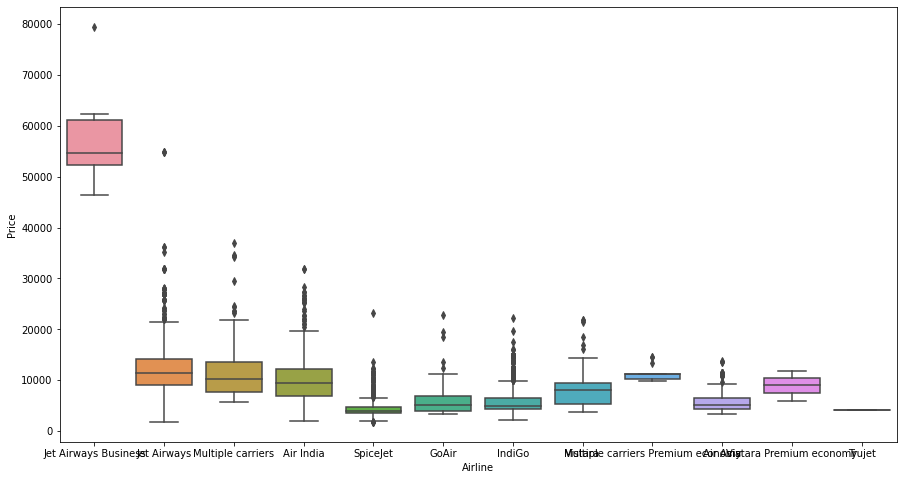

In [ ]:
# 航空公司與價格關係
plt.figure(figsize=(15, 8))
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False))
plt.show()

### Jet Airways Business公司的機票價格是最高的
### 其他公司的價格中位數是比較接近的

In [ ]:
# 
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
3835,0,0,0,0,0,0,0,1,0,0,0
7356,0,0,0,0,0,1,0,0,0,0,0
486,0,0,0,1,0,0,0,0,0,0,0
3545,1,0,0,0,0,0,0,0,0,0,0
3543,0,0,1,0,0,0,0,0,0,0,0


## 停留地 (Total_Stops)

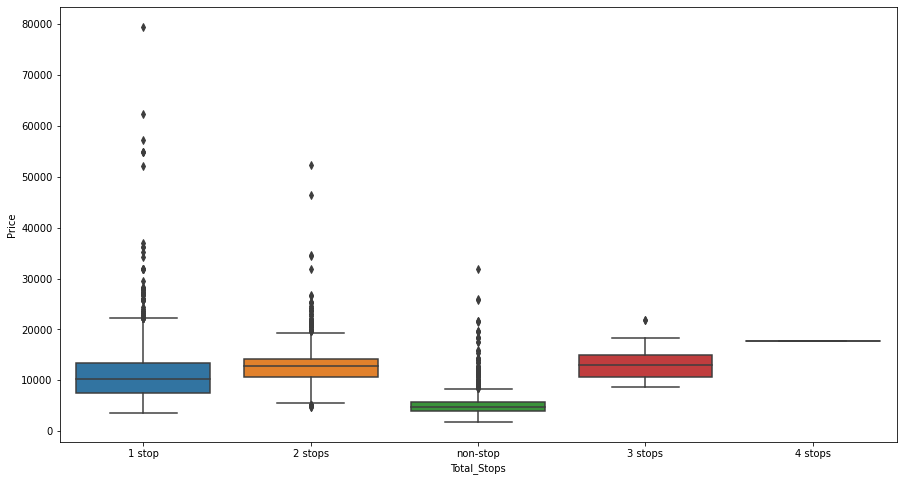

In [ ]:
# 停留地和價格的關係
plt.figure(figsize=(15, 8))
sns.boxplot(x='Total_Stops', y='Price', data=data.sort_values('Price', ascending=False))
plt.show()

In [ ]:
dict_stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

categorical['Total_Stops'] = categorical['Total_Stops'].map(dict_stops)

categorical.head()

<ipython-input-317-007c24d8b232>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict_stops)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,0,No info
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2,No info
3543,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info


## 出發地 (Source)

<Figure size 1296x864 with 0 Axes>

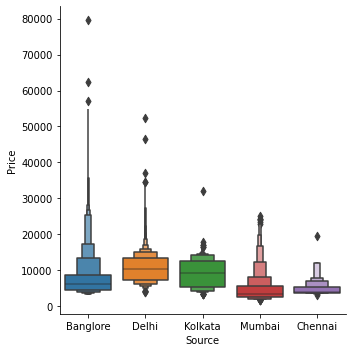

In [ ]:
# 出發地和價格的關係
plt.figure(figsize=(18, 12))
sns.catplot(x='Source', y='Price', data=data.sort_values('Price', ascending=False), kind='boxen')
plt.show()

In [ ]:
source = pd.get_dummies(categorical['Source'], drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
3835,0,0,1,0
7356,0,1,0,0
486,0,0,0,0
3545,0,0,0,0
3543,0,0,0,0


## 目的地 (Destination)

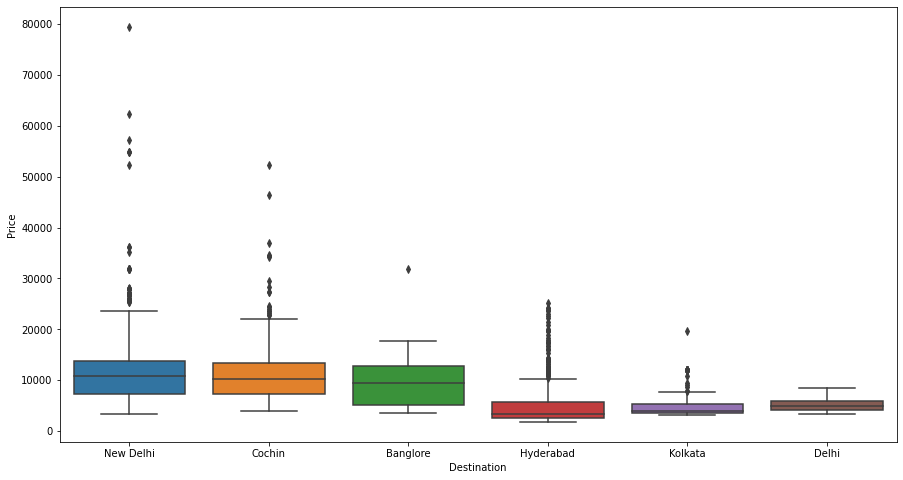

In [ ]:
# 目的地和價格的關係
plt.figure(figsize=(15, 8))
sns.boxplot(x='Destination', y='Price', data=data.sort_values('Price', ascending=False))
plt.show()

In [ ]:
destination = pd.get_dummies(categorical['Destination'], drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
3835,0,0,0,0,0
7356,1,0,0,0,0
486,0,0,0,0,1
3545,0,0,0,0,1
3543,0,0,0,0,1


## 路線Route

In [ ]:
# 不同路線的數量統計
categorical['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
CCU → RPR → HYD → BLR             1
BLR → HBX → BOM → NAG → DEL       1
CCU → IXB → DEL → BLR             1
BLR → BOM → IXC → DEL             1
Name: Route, Length: 128, dtype: int64

In [ ]:
# 提取路線名稱
categorical['Route1'] = categorical['Route'].str.split('→').str[0]
categorical['Route2'] = categorical['Route'].str.split('→').str[1]
categorical['Route3'] = categorical['Route'].str.split('→').str[2]
categorical['Route4'] = categorical['Route'].str.split('→').str[3]
categorical['Route5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-323-113772a86b1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-323-113772a86b1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-323-113772a86b1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,0,No info,CCU,BLR,NaN,NaN,NaN
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,DEL,BOM,COK,NaN,NaN
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,No info,BLR,BOM,DEL,NaN,NaN
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2,No info,BLR,BOM,IDR,DEL,NaN
3543,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,BLR,DEL,NaN,NaN,NaN


In [ ]:
# 處理缺失值

# 刪除原始
categorical.drop('Route', axis=1, inplace=True)

categorical.isnull().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [ ]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# LabelEncoder
le = LabelEncoder()

for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i] = le.fit_transform(categorical[i])

categorical.head()

<ipython-input-327-6d5e026fecf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = le.fit_transform(categorical[i])


,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
3835,SpiceJet,Kolkata,Banglore,0,No info,2,5,29,13,5
7356,Multiple carriers,Delhi,Cochin,1,No info,3,7,6,13,5
486,Jet Airways,Banglore,New Delhi,1,No info,0,7,8,13,5
3545,Air India,Banglore,New Delhi,2,No info,0,7,15,6,5
3543,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5


## 抵達時間 (Arrival_Time_hour)

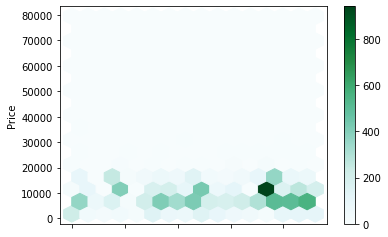

In [ ]:
data.plot.hexbin(x='Arrival_Time_hour', y='Price', gridsize=15)
plt.show()

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
# 刪除無效欄，把無效欄位直接刪除
drop_col(categorical, 'Airline')
drop_col(categorical, 'Source')
drop_col(categorical, 'Destination')
drop_col(categorical, 'Additional_Info')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# 把多個 DataFrame 拼接 (這是最終的資料)
final_data = pd.concat([categorical, Airline, source, destination, data[continuous_col]], axis=1)

final_data.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hour,Dur_minute
3835,0,2,5,29,13,5,0,0,0,0,...,0,5515,3,1,9,0,11,30,2,30
7356,1,3,7,6,13,5,0,0,0,0,...,0,29528,3,1,0,20,13,20,13,0
486,1,0,7,8,13,5,0,0,0,1,...,1,26890,3,1,8,55,15,15,6,20
3545,2,0,7,15,6,5,1,0,0,0,...,1,19372,3,1,8,50,11,10,26,20
3543,0,0,13,29,13,5,0,0,1,0,...,1,10067,3,1,10,5,13,0,2,55


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


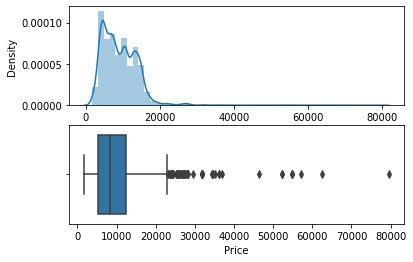

In [ ]:
# 離群點的檢測
# 把最終資料進行離群點的檢測
def plot(data, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(data[col], ax=ax1)
    sns.boxplot(data[col], ax=ax2)
    
plot(final_data, 'Price')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


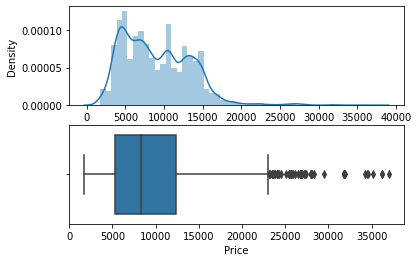

In [ ]:
# 補充均值，看看填充後的效果
# 替換部分, 替換資料, 替換欄位
final_data['Price'] = np.where(final_data['Price']>=40000, final_data['Price'].median(), final_data['Price'])

plot(final_data, 'Price')

In [ ]:
# 切資料
X = final_data.drop('Price', axis=1)
y = data['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 特徵選擇
from sklearn.feature_selection import mutual_info_classif
imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)

imp.columns = ['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route2,2.789892
Route3,2.295436
Total_Stops,2.159615
Route1,2.028008
Arrival_Time_hour,1.843706
Dur_hour,1.773911
Cochin,1.550897
Delhi,1.546920
Arrival_Time_minute,1.521551
Route4,1.519295


In [ ]:
#評價指標
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def pred(mmodel):
    print('Model is: ', mmodel)
    
    model = mmodel.fit(X_train, y_train)
    print('Training Score: ', model.score(X_train, y_train))
    
    predictions = model.predict(X_test)
    print('Predictions: ', predictions)
    
    r2score = r2_score(y_test, predictions)
    print('R2_Score: ', r2score)
    
    print('MAE: ', mean_absolute_error(y_test, predictions))
    print('MSE: ', mean_squared_error(y_test, predictions))
    print('RMAE: ', np.sqrt(mean_squared_error(y_test, predictions)))
    
    # 真實和預測的差
    sns.displot(y_test - predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

Model is:  RandomForestRegressor()
Training Score:  0.9537017009594272
Predictions:  [13785.79        8703.23       10583.05       ...  4195.45309524
  5476.51       11374.18      ]
R2_Score:  0.8171535746387983
MAE:  1187.3050416076671
MSE:  3939086.9645205643
RMAE:  1984.7133204875117


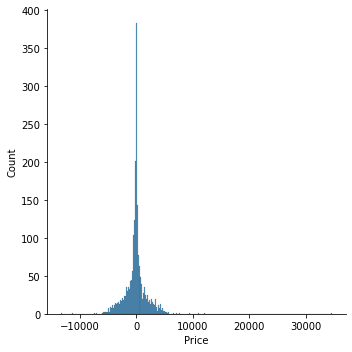

In [ ]:
#隨機森林
pred(RandomForestRegressor())

Model is:  LogisticRegression()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score:  0.3409011117612639
Predictions:  [11410 13377 10151 ...  4823  4959  9626]
R2_Score:  0.43722374441741063
MAE:  1953.3954141319607
MSE:  12123970.200280767
RMAE:  3481.9491955341286


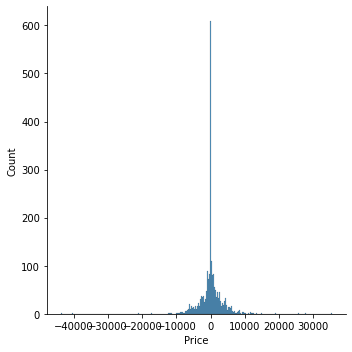

In [ ]:
# 邏輯回歸
pred(LogisticRegression())

Model is:  KNeighborsRegressor()
Training Score:  0.7483786792679075
Predictions:  [12536.   8661.6 11336.6 ...  4303.8  5343.4 10031. ]
R2_Score:  0.6089786886459118
MAE:  1786.1161441272811
MSE:  8423828.616621433
RMAE:  2902.383264943042


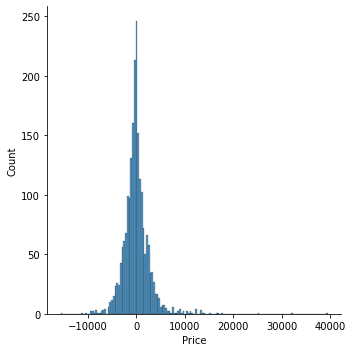

In [ ]:
# KNN
pred(KNeighborsRegressor())

Model is:  DecisionTreeRegressor()
Training Score:  0.9709432221308125
Predictions:  [14848.   9424.  10151.  ...  4311.5  5073.  10283. ]
R2_Score:  0.7046741669212585
MAE:  1369.9028310715955
MSE:  6362247.099272475
RMAE:  2522.349519648789


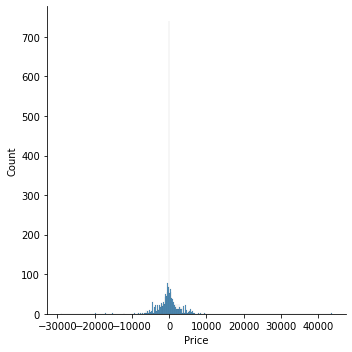

In [ ]:
# 決策樹
pred(DecisionTreeRegressor())

Model is:  SVR()
Training Score:  0.04165125690319571
Predictions:  [8370.92841131 8428.61666301 8342.35824744 ... 7812.90918334 8422.95116116
 8801.25902161]
R2_Score:  0.04685396060941582
MAE:  3382.4479176699347
MSE:  20533762.86482508
RMAE:  4531.419519844205


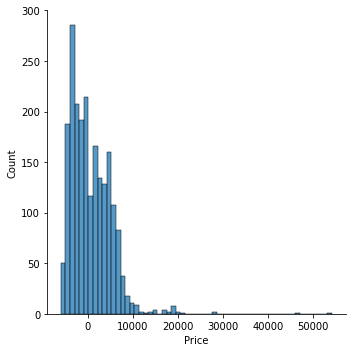

In [ ]:
# SVR
pred(SVR())

Model is:  GradientBoostingRegressor()
Training Score:  0.8096664021505166
Predictions:  [10223.59621255 10323.17704228 10670.30069858 ...  4783.46557736
  5972.34022813 14163.09402986]
R2_Score:  0.7745261988782289
MAE:  1488.929179536159
MSE:  4857414.680572311
RMAE:  2203.9543281502706


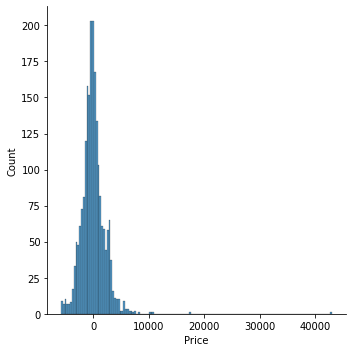

In [ ]:
# 梯度提升迴歸 GradientBoostingRegressor
pred(GradientBoostingRegressor())

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

final_data = pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns )
final_data


,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hour,Dur_minute
0,0.00,0.50,0.113636,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.106632,0.000,0.0,0.391304,0.000000,0.478261,0.545455,0.042553,0.545455
1,0.25,0.75,0.159091,0.206897,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.788355,0.000,0.0,0.000000,0.363636,0.565217,0.363636,0.276596,0.000000
2,0.25,0.00,0.159091,0.275862,1.000000,1.0,0.0,0.0,0.0,1.0,...,1.0,0.713462,0.000,0.0,0.347826,1.000000,0.652174,0.272727,0.127660,0.363636
3,0.50,0.00,0.159091,0.517241,0.461538,1.0,1.0,0.0,0.0,0.0,...,1.0,0.500028,0.000,0.0,0.347826,0.909091,0.478261,0.181818,0.553191,0.363636
4,0.00,0.00,0.295455,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.235862,0.000,0.0,0.434783,0.090909,0.565217,0.000000,0.042553,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.25,0.75,0.159091,0.206897,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.371593,0.125,1.0,0.391304,0.000000,0.826087,0.272727,0.212766,0.272727
10678,0.25,0.50,0.159091,0.103448,1.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.307092,0.125,1.0,0.869565,0.000000,0.173913,0.727273,0.170213,0.727273
10679,0.50,0.75,0.022727,0.137931,0.384615,1.0,0.0,0.0,0.0,1.0,...,0.0,0.356036,0.125,1.0,0.782609,0.363636,0.826087,0.000000,0.510638,0.727273
10680,0.50,0.75,0.022727,0.137931,0.384615,1.0,0.0,0.0,0.0,1.0,...,0.0,0.356036,0.125,1.0,0.347826,0.181818,0.173913,0.454545,0.425532,0.272727


In [ ]:
import tqdm
n = 60
feature_names = list(final_data.drop('Price', axis = 1).columns )
X = []
Y = []
indexex = []
norm_data_x = final_data[ feature_names ]
for i in tqdm.tqdm_notebook(range(0, len(final_data)-n)):
    X.append( norm_data_x.iloc[i:i+n].values)
    Y.append( final_data['Price'].iloc[i+n-1])
X = np.array(X)
Y = np.array(Y)

<ipython-input-345-4d56d544767d>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0, len(final_data)-n)):


  0%|          | 0/10622 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.25, random_state = 1 )


In [ ]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed


Lstm = Sequential()

Lstm.add(LSTM(units = 512, return_sequences = True, input_shape = (60, 38)))
Lstm.add(Dropout(0.2))

Lstm.add(LSTM(units = 256, return_sequences = True))
Lstm.add(Dropout(0.2))
Lstm.add(TimeDistributed(Dense(1)))

Lstm.add(LSTM(units = 50, return_sequences = True))
Lstm.add(Dropout(0.2))

Lstm.add(LSTM(units = 128 ))
Lstm.add(Dropout(0.2))

Lstm.add(Dense(units=5, activation="softmax"))

Lstm.add(Dense(units = 1))

Lstm.compile(optimizer = 'adam', loss = 'mean_squared_error' )


In [ ]:
import tensorflow  as tf

checkpoint = tf.keras.callbacks.ModelCheckpoint('lstm_model_checkpoint_argmax.h5', verbose=1,
                                 monitor='val_loss', save_best_only=True,
                                 mode='min')
    
    
    # 設定lr降低條件(0.001 → 0.0005 → 0.00025 → 0.000125 → 0.0001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, mode='min', verbose=1,
                                  min_lr=1e-5)
history = Lstm.fit( X_train, y_train, validation_data=( [ X_val, y_val ]), batch_size = 100, epochs = 40, callbacks=[ checkpoint, reduce_lr ] )

Epoch 1/40
107/107 [==============================] - 10s 38ms/step - loss: 0.0134
Epoch 2/40
107/107 [==============================] - 4s 37ms/step - loss: 0.0126
Epoch 3/40
107/107 [==============================] - 4s 38ms/step - loss: 0.0091
Epoch 4/40
107/107 [==============================] - 4s 38ms/step - loss: 0.0051
Epoch 5/40
107/107 [==============================] - 4s 38ms/step - loss: 0.0046
Epoch 6/40
107/107 [==============================] - 4s 38ms/step - loss: 0.0045
Epoch 7/40
107/107 [==============================] - 4s 39ms/step - loss: 0.0042
Epoch 8/40
107/107 [==============================] - 4s 39ms/step - loss: 0.0042
Epoch 9/40
107/107 [==============================] - 4s 39ms/step - loss: 0.0040
Epoch 10/40
107/107 [==============================] - 4s 39ms/step - loss: 0.0039
Epoch 11/40
107/107 [==============================] - 4s 39ms/step - loss: 0.0037
Epoch 12/40
107/107 [==============================] - 4s 39ms/step - loss: 0.0038
Epoch 13/40


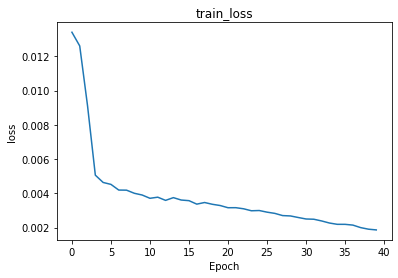

In [ ]:

import matplotlib.pyplot as plt

plt.title( 'train_loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'Epoch' )
plt.plot( history.history[ 'loss' ] )


In [ ]:
from sklearn.metrics import r2_score
Lstm.summary()

predictions = Lstm.predict( X_test )
r2score = r2_score( y_test, predictions )
print( 'R2_Score: ', r2score )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 512)           1128448   
                                                                 
 dropout_18 (Dropout)        (None, 60, 512)           0         
                                                                 
 lstm_19 (LSTM)              (None, 60, 256)           787456    
                                                                 
 dropout_19 (Dropout)        (None, 60, 256)           0         
                                                                 
 time_distributed_5 (TimeDis  (None, 60, 1)            257       
 tributed)                                                       
                                                                 
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                      

In [ ]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMAE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  1586.7600097366603
MSE:  4188337.7408855776
RMAE:  2046.54287540857
